Handwritten digits dataset with CNN

In [32]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

Load data

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train.shape, y_train.shape, X_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [10]:
X_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [19]:
y_train[:2]

array([5, 0], dtype=uint8)

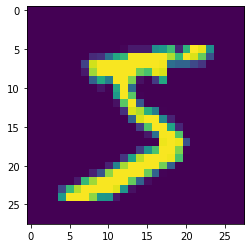

In [14]:
plt.imshow(X_train[0])

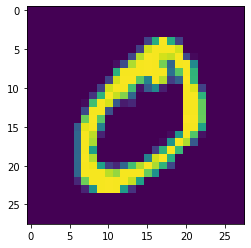

In [15]:
plt.imshow(X_train[1])

Scale data

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
X_test_scaled.shape

(10000, 28, 28)

Lets create a ANN model and lets look how much efficency we get

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500, activation ='relu'),
        keras.layers.Dense(100, activation ='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1926 - accuracy: 0.9424
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0822 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0549 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0398 - accuracy: 0.9875
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0314 - accuracy: 0.9896


In [31]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0833 - accuracy: 0.9776


[0.08325457572937012, 0.9775999784469604]

In [36]:
yp = model.predict(X_test_scaled)
y_pred = [np.argmax(element) for element in yp]
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


[7, 2, 1, 0, 4]

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.95      0.97       982
           5       1.00      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.93      0.99      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Lets build an CNN model

In [70]:
cnn = keras.Sequential([
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2263 - accuracy: 0.9345
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0718 - accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0509 - accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0381 - accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0308 - accuracy: 0.9904


In [71]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 264.4501 - accuracy: 0.7862


[264.4501037597656, 0.7861999869346619]

In [72]:
yp = cnn.predict(X_test)
y_pred = [np.argmax(element) for element in yp]
y_pred[:15]

313/313 [==============================] - 2s 6ms/step


[7, 2, 1, 0, 4, 7, 4, 4, 0, 4, 0, 0, 4, 0, 1]

In [73]:
y_test[:15]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1], dtype=uint8)

In [74]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       980
           1       0.59      0.98      0.74      1135
           2       0.38      0.66      0.48      1032
           3       0.29      0.64      0.40      1010
           4       0.51      0.87      0.64       982
           5       0.38      0.19      0.26       892
           6       0.77      0.06      0.11       958
           7       0.96      0.06      0.12      1028
           8       0.86      0.07      0.13       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.46     10000
   macro avg       0.53      0.45      0.36     10000
weighted avg       0.53      0.46      0.37     10000



c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi